# Quora Question Pairs: Identify Duplicate Questions
We have given set of questions asked on Quora, a forum website with more than 100 Million visitors a month. We need to find duplicates of questions that have been asked already. The idea is to provide instant answers to questions that have been answered. Let's predict whether a pair of questions are duplicate or not. This is be a binary prediction against the logloss metric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

The training dataset is much smaller than testing dataset. This is to prevent hand-labeling and is also an indication that the accuracy will be low.

In [2]:
df_train = pd.read_csv("D:/Kaggle/Quora Question Pairs/train/train.csv")
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


The data fields are:<br>
<b>id</b> : ID for each row<br>
<b>qid1/qid2</b> : The unique ID for each question in the pair<br>
<b>is_duplicate</b> : Label to be predicted(Whether the two questions are duplicates of each other

Total number of question pairs for training: 404290
Duplicate Pairs are: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



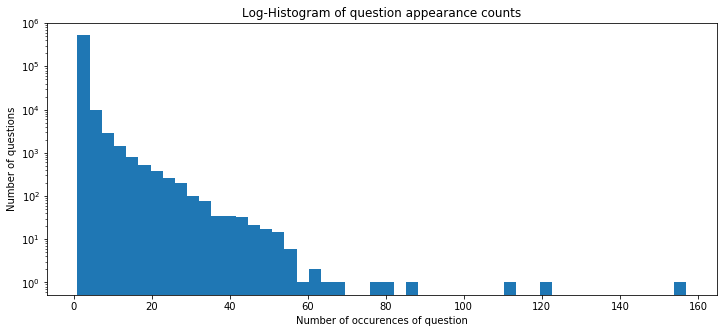

In [3]:
print("Total number of question pairs for training: {}" .format(len(df_train)))
print("Duplicate Pairs are: {}%" .format(round(df_train['is_duplicate'].mean() * 100, 2)))
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
print("Total number of questions in the training data: {}" .format(len(np.unique(qids))))
print("Number of questions that appear multiple times: {}" .format(np.sum(qids.value_counts() > 1)))

plt.figure(figsize = (12, 5))
plt.hist(qids.value_counts(), bins = 50)
plt.yscale('log', nonposy = "clip")
plt.title("Log-Histogram of question appearance counts")
plt.xlabel("Number of occurences of question")
plt.ylabel("Number of questions")
print()

We can see that there are few questions appearing many times and many questions appearing few times. One question appears more than 160 times.<br>
We are using logloss metric for evaluation. Log loss quantifies the accuracy of a classifier by penalising false classifications. Hence, minimising Log Loss is bsaically equivalent to maximising  the accuracy of the classifier.<br>
To calculate Log Loss the classifier must assign a probability to each class rather than simply yielding the most likely class. <br>
There are two ways to dealing with poor classifications in this case:<br>
1) Examine outliers. If there are outliers, remove them and retrain the classifier.<br>
2) Smmothing the probabilities using Laplace Smoothing.

# Test Set

In [4]:
from sklearn.metrics import log_loss

# Predicted Probability
p = df_train['is_duplicate'].mean()
print("Predicted Score: ", log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

df_test = pd.read_csv("D:/Kaggle/Quora Question Pairs/test/test.csv")
df_test.drop_duplicates(subset = 'test_id', inplace=True)
df_test = df_test[df_test['test_id'].apply(lambda x: isinstance(x, int))]
df_test['test_id'] = df_test['test_id'].astype('int64')
sub = pd.DataFrame({'test_id' : df_test['test_id'], 'is_duplicate' : p})
sub.to_csv("D:/Kaggle/Quora Question Pairs/submission/naive_submission.csv", index = False)
sub.head()

Predicted Score:  0.658527383984


C:\Users\yoges\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


In [ ]:
df_test = pd.read_csv("D:/Kaggle/Quora Question Pairs/test/test.csv")
df_test.head()

<b>np.zeros_like</b>: Returns array of zeros with same shape and type of the given array<br>
<b>sklearn.metrics.log_loss</b>: log_loss(y_true, y_pred)

In [5]:
print("Total number of question pairs for testing: {}" .format(len(df_test)))

Total number of question pairs for testing: 2345796


# Text Analysis

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test 31.62 max-train 1169.00 max-test 1176.00


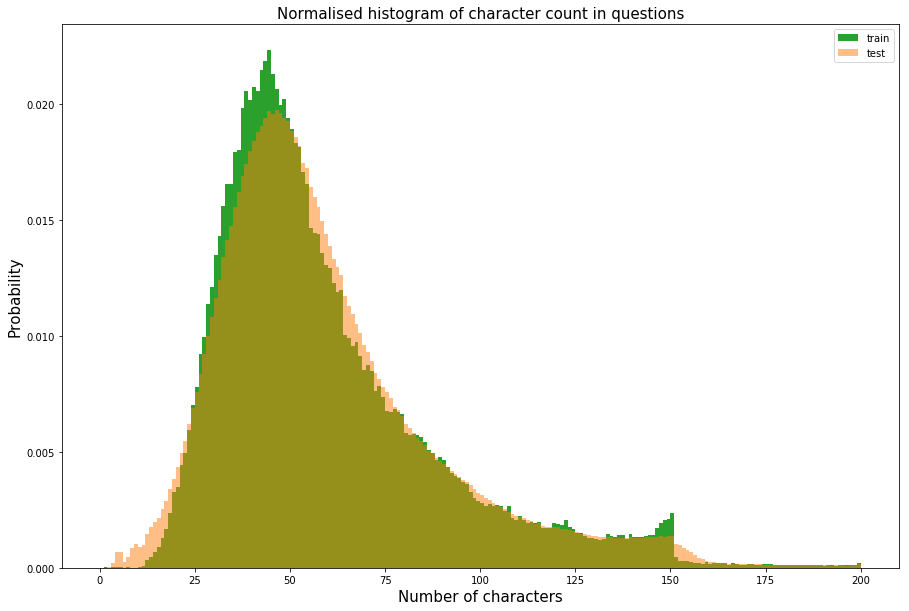

In [6]:
# # Number of Characters in each question
# train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
# test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

# dist_train = train_qs.apply(len)
# dist_test = test_qs.apply(len)

# print(dist_train, dist_test)

train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins = 200, range = [0,200], color = pal[2], normed = True, label = 'train')
plt.hist(dist_test, bins = 200, range = [0,200], color = pal[1], normed = True, alpha = 0.5, label = 'test')
plt.title("Normalised histogram of character count in questions", fontsize = 25)
plt.legend()
plt.xlabel("Number of characters", fontsize = 15)
plt.ylabel("Probability", fontsize = 15)
print("mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max_test {:.2f}" .format(dist_train.mean(), dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

There are few points of interests to be noticed here:<br>
1) Most questions have between 15 to 150 characters in them.<br>
2) In training set, there is a high peak at 150 characters, whereas for testing set, curve decreases slowly after 150.<br>
3) Even though there are questions with more than 200 characters, I have truncated the histogram to 200 characters.

mean-train 11.06 std-train 5.89 mean-test 11.02 std-test 5.84 max-train 237.00 max-test 238.00


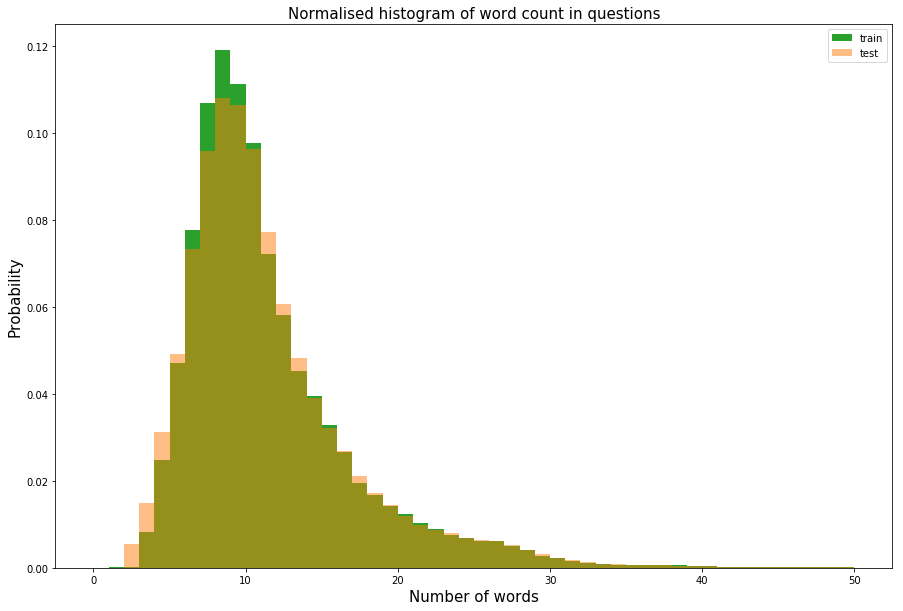

In [7]:
# # Count the number of words
# dist_train = train_qs.apply(lambda x: len(x.split(" ")))
# dist_test = test_qs.apply(lambda x: len(x.split(" ")))

# print(dist_train, dist_test)

dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins = 50, range = [0,50], color = pal[2], normed = True, label = 'train')
plt.hist(dist_test, bins = 50, range = [0,50], color = pal[1], normed = True, alpha = 0.5, label = 'test')
plt.title("Normalised histogram of word count in questions", fontsize = 25)
plt.legend()
plt.xlabel("Number of words", fontsize = 15)
plt.ylabel("Probability", fontsize = 15)
print("mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max_test {:.2f}" .format(dist_train.mean(), dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

Interesting thing to be oticed here is distributions for word count and character count are similar.<br>
For word distribution, most of the questions are 10 words long.<br>
Let us look at some of the most common words using Word Cloud.

(-0.5, 1439.5, 1079.5, -0.5)

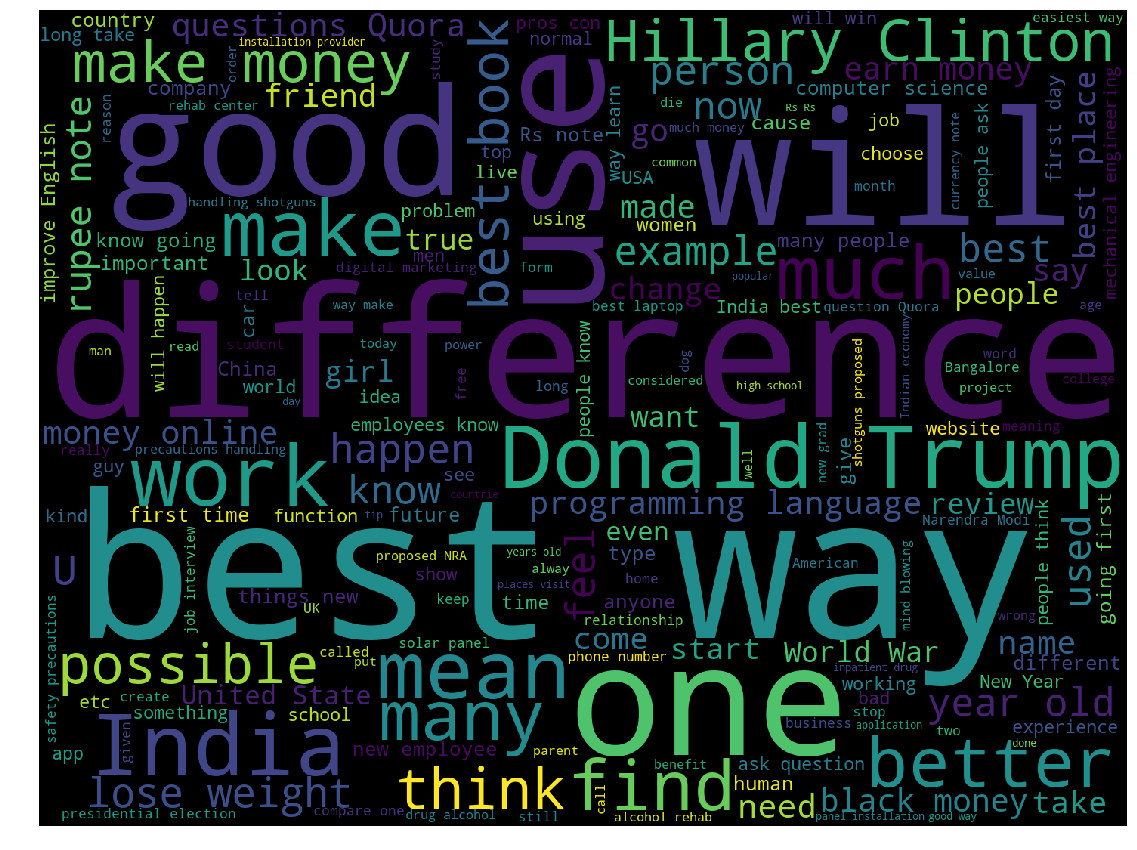

In [8]:
from wordcloud import WordCloud
cloud = WordCloud(width = 1440, height = 1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis("off")

Most common words include: Difference, Donald Trump, best way, mean, will, good, use, etc

# Semantic Analysis
Let's take a look at punctuations in questions

In [9]:
qmarks = np.mean(train_qs.apply(lambda x: "?" in x))
math = np.mean(train_qs.apply(lambda x: "[math]" in x))
fullstop = np.mean(train_qs.apply(lambda x: "." in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print("Questions with question marks: {:.2f}%".format(qmarks *100))
print("Questions with [math] tags: {:.2f}%".format(math *100))
print("Questions with full stops: {:.2f}%".format(fullstop*100))
print("Question pairs with capitalised first letter: {:.2f}%".format(capital_first * 100))
print("Questions with capital letters: {:.2f}%".format(capitals * 100))
print("Questions with numbers: {:.2f}%".format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Question pairs with capitalised first letter: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


# Feature Analysis

In [ ]:
from __future__ import print_function, division

Text(0.5,0,'word_match_share')

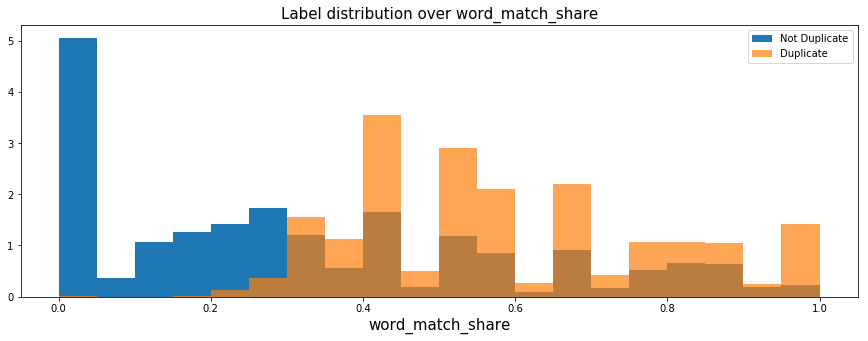

In [10]:
# from nltk.corpus import stopwords

# stops = set(stopwords.words("english"))

# def word_match_share(row):
#     q1words = {}
#     q2words = {}
#     for word in str(row['question1']).lower().split():
#         if word not in stops:
#             q1words[word] = 1
#     for word in str(row['question2']).lower().split():
#         if word not in stops:
#             q2words[word] = 1
#     if len(q1words) == 0 or len(q2words) == 0:
#         # There are few questions which arre only stopwords. We can easily figure it out that these questions are computer-generated
#         return 0
    
#     shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
#     shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
#     R = (len(shared_words_in_q1) + len(shared_words_in_q2))// (len(q1words) + len(q2words))
#     return R

# plt.figure(figsize = (15, 5))
# train_word_match = df_train.apply(word_match_share, axis = 1, raw = True)
# plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins = 20, normed = True, label = 'Not Duplicate')
# plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins = 20, normed = True, alpha = 0.7, label = 'Duplicate')
# plt.legend()
# plt.title("Label distribution over word_match_share", fontsize = 15)
# plt.xlabel("word_match_share", fontsize = 15)

from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

plt.figure(figsize=(15, 5))
train_word_match = df_train.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[df_train['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[df_train['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

Here, we can see that deduplication feature has strong ability to predict. But it seems very good at identifying questions and not so good at finding questions which are definitely duplicates.

# TF-IDF(Term-Frequency-Inverse-Document-Frequency)
This means that we weigh terms by how uncommon they are, meaning that we care more about rare words existing in both questions than common one, because uncommon words will be more indicative of the content.<br>
<b>TfidVectorizer</b> : This conveerts a collection of raw documents to a matrix of TF-IDF features. <br>
<b> Vectorizer</b> : Operations are applied to whole arrays instead of individual elements.

In [11]:
# from collections import Counter

# # If a word appears only once, we ignore completely
# # Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller.
# def get_weight(count, eps = 10000, min_count = 2):
#     if count < min_count:
#         return 0
#     else:
#         return 1 / (count + eps)
    
# eps = 5000
# words = (" ".join(train_qs)).lower().split()
# counts = Counter(words)
# weights = {word: get_weight(count) for word, count in counts.items()}

from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [12]:
# print("Most common words and weights: \n")
# print(sorted(weights.items(), key = lambda x: x[1] if x[1] > 0 else 9999)[:10])
# print("\nLeast common words and weights are: ")
# print(sorted(weights.items(), key = lambda x: x[1], reverse = True)[:10])

print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し?', 9.998000399920016e-05),
 ('19-year-old.', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('109?', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05),
 ('fulfill?', 9.998000399920016e-05)]

In [13]:
# def tfidf_word_match_share(row):
#     q1words = {}
#     q2words = {}
#     for word in str(row['question1']).lower().split():
#         if word not in stops:
#             q1words[word] = 1
#     for word in str(row['question2']).lower().split():
#         if word not in stops:
#             q2words[word] = 1
#     if len(q1words) == 0 or len(q2words) == 0:
#         # There are few questions which arre only stopwords. We can easily figure it out that these questions are computer-generated
#         return 0
#     shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w,0) for w in q2words.keys() if w in q1words]
#     total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
#     R = np.sum(shared_weights) / np.sum(total_weights)
#     return R

def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

C:\Users\yoges\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5,0,'word_match_share')

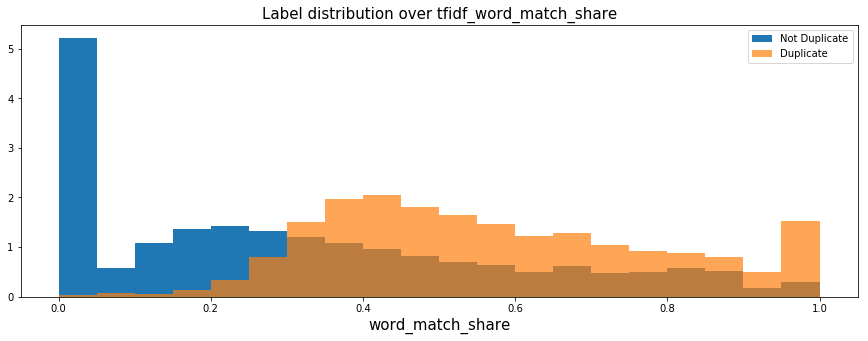

In [14]:
# plt.figure(figsize = (15, 5))
# tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis = 1, raw = True)
# plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins = 20, normed = True, label = 'Not Duplicate')
# plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins = 20, normed = True, alpha = 0.7, label = 'Duplicate')
# plt.legend()
# plt.title("Label distribution over tfidf_word_match_share", fontsize = 15)
# plt.xlabel("word_match_share", fontsize = 15)

plt.figure(figsize=(15, 5))
tfidf_train_word_match = df_train.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[df_train['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [15]:
# from sklearn.metrics import roc_auc_score
# print("Original AUC:", roc_auc_score(df_train['is_duplicate'], train_word_match))
# print("TFIDF AUC:", roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(df_train['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(df_train['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.780432704935
   TFIDF AUC: 0.770480229222


AUC metric is used because it is unaffectedby scaling and similar, so it is good metric for testing the predictive power of individual features.<br><br>
We will use XGBoost to make a classification model.

# Rebalancing the Data
Rebalancing the data at this stage is very important because we have 37% positive class in our training data and only 17% positive class in our testing data.<br>
By rebalancing the data so our training set has 17% positives, we can ensure that XGBoost results into better probabilities. This is important because LogLoss metric looks at the probabilities

In [16]:
# # LEt's create our training and testing data
# x_train = pd.DataFrame()
# x_test = pd.DataFrame()
# x_train['word_match'] = train_word_match
# x_train['tfidf_word_match'] = tfidf_train_word_match
# x_test['word_match'] = df_test.apply(word_match_share, axis=1, raw=True)
# x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis = 1, raw = True)

# y_train = df_train['is_duplicate'].values

# First we create our training and testing data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = df_test.apply(word_match_share, axis = 1, raw=True)
x_test['tfidf_word_match'] = df_test.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = df_train['is_duplicate'].values

C:\Users\yoges\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\yoges\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars


In [17]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# Let's oversample the negative class
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_Train = pd.concat([neg_train, neg_train])
    scale -= 1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.3210827019794611


In [20]:
# let's split the data for validation
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)


# Using XGBoost

In [21]:
import xgboost as xgb

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.685829	valid-logloss:0.685814
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.626159	valid-logloss:0.626014
[20]	train-logloss:0.58396	valid-logloss:0.583702
[30]	train-logloss:0.552985	valid-logloss:0.552619
[40]	train-logloss:0.529707	valid-logloss:0.529248
[50]	train-logloss:0.511936	valid-logloss:0.51139
[60]	train-logloss:0.498209	valid-logloss:0.497579
[70]	train-logloss:0.487491	valid-logloss:0.486791
[80]	train-logloss:0.479064	valid-logloss:0.478292
[90]	train-logloss:0.472488	valid-logloss:0.471651
[100]	train-logloss:0.467305	valid-logloss:0.466412
[110]	train-logloss:0.463122	valid-logloss:0.462169
[120]	train-logloss:0.459815	valid-logloss:0.458811
[130]	train-logloss:0.457165	valid-logloss:0.456111
[140]	train-logloss:0.455042	valid-logloss:0.453946
[150]	train-logloss:0.453309	valid-logloss:0.452176
[160]	train-logloss:0.451927	v

In [23]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test

sub.to_csv("D:/Kaggle/Quora Question Pairs/submission/xgb_submission.csv", index=False)